In [1]:
!pip install pandas

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [3]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Path to the file
file_path = '/content/drive/My Drive/LCL-June2015v2_0.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
df.head()

,LCLid,stdorToU,DateTime,KWH/hh (per half hour)
0,MAC000002,Std,2012-10-12 00:30:00.0000000,0
1,MAC000002,Std,2012-10-12 01:00:00.0000000,0
2,MAC000002,Std,2012-10-12 01:30:00.0000000,0
3,MAC000002,Std,2012-10-12 02:00:00.0000000,0
4,MAC000002,Std,2012-10-12 02:30:00.0000000,0


In [5]:
print(df.info())
# Display summary statistics
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 4 columns):
 #   Column                   Non-Null Count    Dtype 
---  ------                   --------------    ----- 
 0   LCLid                    1000000 non-null  object
 1   stdorToU                 1000000 non-null  object
 2   DateTime                 1000000 non-null  object
 3   KWH/hh (per half hour)   1000000 non-null  object
dtypes: object(4)
memory usage: 30.5+ MB
None
            LCLid stdorToU                     DateTime  \
count     1000000  1000000                      1000000   
unique         30        1                        39102   
top     MAC000018      Std  2012-11-20 00:00:00.0000000   
freq        39082  1000000                           58   

       KWH/hh (per half hour)   
count                  1000000  
unique                    4801  
top                         0   
freq                     45538  


In [6]:
# Convert the DateTime column to datetime format
df['DateTime'] = pd.to_datetime(df['DateTime'])

#Renaming consumption coloumn to avoid errors.

In [7]:
# Display the original DataFrame column names
print("Original columns:", df.columns)

# Rename the column
df.rename(columns={'KWH/hh (per half hour) ': 'KWH/hh'}, inplace=True)

# Display the DataFrame after renaming the column
print("\nColumns after renaming:", df.columns)

Original columns: Index(['LCLid', 'stdorToU', 'DateTime', 'KWH/hh (per half hour) '], dtype='object')

Columns after renaming: Index(['LCLid', 'stdorToU', 'DateTime', 'KWH/hh'], dtype='object')


In [8]:
# Convert the renamed column to numeric
df['KWH/hh'] = pd.to_numeric(df['KWH/hh'], errors='coerce')

##Converting half hourly consumption data into daily data.

In [9]:
# Group by day and calculate the mean of kWh/hh for each day
daily_data = df.groupby(df['DateTime'].dt.date)['KWH/hh'].mean().reset_index()

# Print the first few rows of daily_data for verification
print(daily_data.head(100))

      DateTime    KWH/hh
0   2011-12-06  0.133955
1   2011-12-07  0.290976
2   2011-12-08  0.272340
3   2011-12-09  0.237201
4   2011-12-10  0.269921
..         ...       ...
95  2012-03-10  0.240568
96  2012-03-11  0.245150
97  2012-03-12  0.256502
98  2012-03-13  0.263044
99  2012-03-14  0.263745

[100 rows x 2 columns]


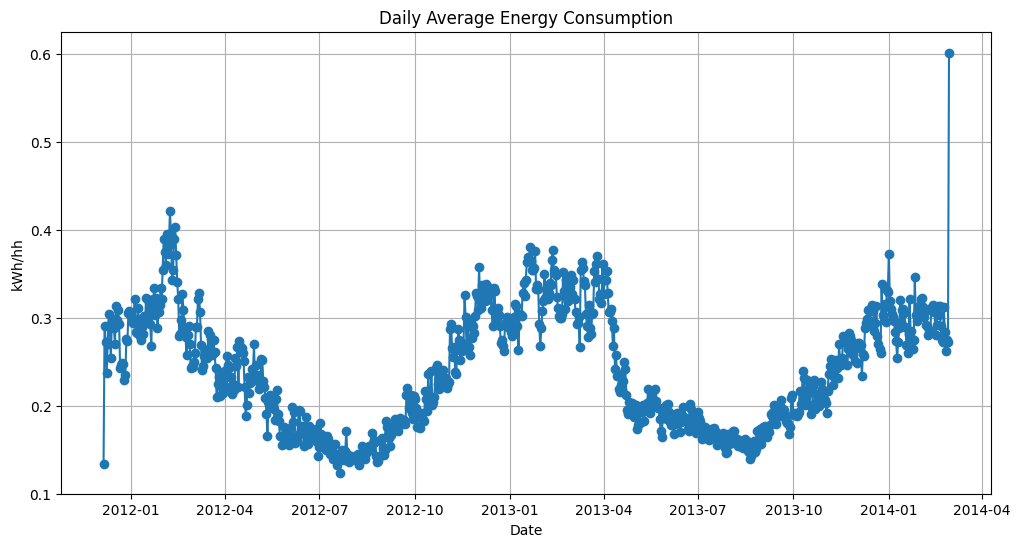

In [10]:
#plotting the data
plt.figure(figsize=(12, 6))
plt.plot(daily_data['DateTime'], daily_data['KWH/hh'], marker='o', linestyle='-')
plt.title('Daily Average Energy Consumption')
plt.xlabel('Date')
plt.ylabel('kWh/hh')
plt.grid(True)
plt.show()

In [11]:
print(daily_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   DateTime  816 non-null    object 
 1   KWH/hh    816 non-null    float64
dtypes: float64(1), object(1)
memory usage: 12.9+ KB
None


In [22]:
file_path = '/content/drive/My Drive/weather-data.csv'

# Read the CSV file into a DataFrame
weatherdf = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to verify
print(weatherdf.head())

         time  weather_code (wmo code)  temperature_2m_max (°C)  \
0  01/11/2011                       51                     15.0   
1  02/11/2011                       51                     14.2   
2  03/11/2011                       53                     15.6   
3  04/11/2011                       61                     14.9   
4  05/11/2011                       51                     13.9   

   temperature_2m_min (°C)  temperature_2m_mean (°C)  \
0                      8.9                      13.1   
1                      8.4                      11.4   
2                     12.9                      14.6   
3                     11.1                      12.7   
4                      8.6                      11.4   

   apparent_temperature_max (°C)  apparent_temperature_min (°C)  \
0                           13.2                            7.1   
1                           12.1                            6.0   
2                           13.7                           

#Converting time column according to required dateTime format.

In [23]:
# Convert the time column to datetime format with dayfirst=True
weatherdf['time'] = pd.to_datetime(weatherdf['time'], dayfirst=True)

# Display the DataFrame to verify the conversion
weatherdf.head()

,time,weather_code (wmo code),temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),apparent_temperature_mean (°C),sunrise (iso8601),sunset (iso8601),daylight_duration (s),sunshine_duration (s),precipitation_sum (mm),rain_sum (mm),precipitation_hours (h),wind_speed_10m_max (km/h),wind_direction_10m_dominant (°)
0,2011-11-01,51,15.0,8.9,13.1,13.2,7.1,11.3,2011-11-01T07:53,2011-11-01T17:34,34876.89,23635.93,0.9,0.9,5,18.8,205
1,2011-11-02,51,14.2,8.4,11.4,12.1,6.0,8.6,2011-11-02T07:55,2011-11-02T17:33,34662.17,24176.65,1.6,1.6,5,23.4,142
2,2011-11-03,53,15.6,12.9,14.6,13.7,11.9,12.8,2011-11-03T07:57,2011-11-03T17:31,34448.32,899.05,4.1,4.1,15,25.8,163
3,2011-11-04,61,14.9,11.1,12.7,12.8,10.2,11.4,2011-11-04T07:59,2011-11-04T17:29,34235.54,10425.34,12.8,12.8,16,19.6,177
4,2011-11-05,51,13.9,8.6,11.4,12.0,7.5,9.7,2011-11-05T08:00,2011-11-05T17:27,34024.06,6934.98,0.4,0.4,4,19.0,355


#Removing missing values.

In [24]:
weatherdf = weatherdf[['time', 'weather_code (wmo code)', 'temperature_2m_max (°C)',
       'temperature_2m_min (°C)', 'temperature_2m_mean (°C)',
       'apparent_temperature_max (°C)', 'apparent_temperature_min (°C)',
       'apparent_temperature_mean (°C)', 'sunrise (iso8601)',
       'sunset (iso8601)', 'daylight_duration (s)', 'sunshine_duration (s)',
       'precipitation_sum (mm)', 'rain_sum (mm)', 'precipitation_hours (h)',
       'wind_speed_10m_max (km/h)', 'wind_direction_10m_dominant (°)']]
weatherdf = weatherdf.dropna()

In [25]:
# Create a new column 'DateTime' which is just the date part of the 'time' column so we have same column name for day in both datasets
weatherdf['DateTime'] = weatherdf['time'].dt.date

##Merging consumption data with weather data.


In [26]:
merged_df = pd.merge(daily_data, weatherdf, on='DateTime')
print(merged_df.head())

     DateTime    KWH/hh       time  weather_code (wmo code)  \
0  2011-12-06  0.133955 2011-12-06                        3   
1  2011-12-07  0.290976 2011-12-07                       51   
2  2011-12-08  0.272340 2011-12-08                       53   
3  2011-12-09  0.237201 2011-12-09                        1   
4  2011-12-10  0.269921 2011-12-10                        1   

   temperature_2m_max (°C)  temperature_2m_min (°C)  temperature_2m_mean (°C)  \
0                      6.3                      2.0                       4.0   
1                      7.8                      4.2                       6.2   
2                     12.0                      2.8                       7.9   
3                      6.9                      1.8                       4.6   
4                      5.2                     -1.1                       1.4   

   apparent_temperature_max (°C)  apparent_temperature_min (°C)  \
0                            1.8                           -2.9   


In [28]:
merged_df.head()

,DateTime,KWH/hh,time,weather_code (wmo code),temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),apparent_temperature_mean (°C),sunrise (iso8601),sunset (iso8601),daylight_duration (s),sunshine_duration (s),precipitation_sum (mm),rain_sum (mm),precipitation_hours (h),wind_speed_10m_max (km/h),wind_direction_10m_dominant (°)
0,2011-12-06,0.133955,2011-12-06,3,6.3,2.0,4.0,1.8,-2.9,-0.7,2011-12-06T08:50,2011-12-06T16:52,28967.40,16641.27,0.0,0.0,0,20.4,254
1,2011-12-07,0.290976,2011-12-07,51,7.8,4.2,6.2,1.8,-0.8,0.5,2011-12-07T08:51,2011-12-07T16:52,28875.76,23479.32,0.1,0.1,1,32.7,266
2,2011-12-08,0.272340,2011-12-08,53,12.0,2.8,7.9,5.9,-1.5,2.8,2011-12-08T08:52,2011-12-08T16:52,28789.60,1280.06,1.4,1.4,4,39.6,231
3,2011-12-09,0.237201,2011-12-09,1,6.9,1.8,4.6,1.7,-2.5,-0.6,2011-12-09T08:53,2011-12-09T16:52,28708.74,23253.98,0.0,0.0,0,26.6,260
4,2011-12-10,0.269921,2011-12-10,1,5.2,-1.1,1.4,1.3,-5.2,-2.6,2011-12-10T08:54,2011-12-10T16:51,28633.31,23067.75,0.0,0.0,0,13.3,250


In [29]:
print("Energy data date range:", daily_data['DateTime'].min(), daily_data['DateTime'].max())
print("Weather data date range:", weatherdf['DateTime'].min(), weatherdf['DateTime'].max())

Energy data date range: 2011-12-06 2014-02-28
Weather data date range: 2011-11-01 2014-02-28


In [30]:
# Check for missing values in the DataFrame
print("Missing values in each column:")
print(merged_df.isna().sum())

Missing values in each column:
DateTime                           0
KWH/hh                             0
time                               0
weather_code (wmo code)            0
temperature_2m_max (°C)            0
temperature_2m_min (°C)            0
temperature_2m_mean (°C)           0
apparent_temperature_max (°C)      0
apparent_temperature_min (°C)      0
apparent_temperature_mean (°C)     0
sunrise (iso8601)                  0
sunset (iso8601)                   0
daylight_duration (s)              0
sunshine_duration (s)              0
precipitation_sum (mm)             0
rain_sum (mm)                      0
precipitation_hours (h)            0
wind_speed_10m_max (km/h)          0
wind_direction_10m_dominant (°)    0
dtype: int64


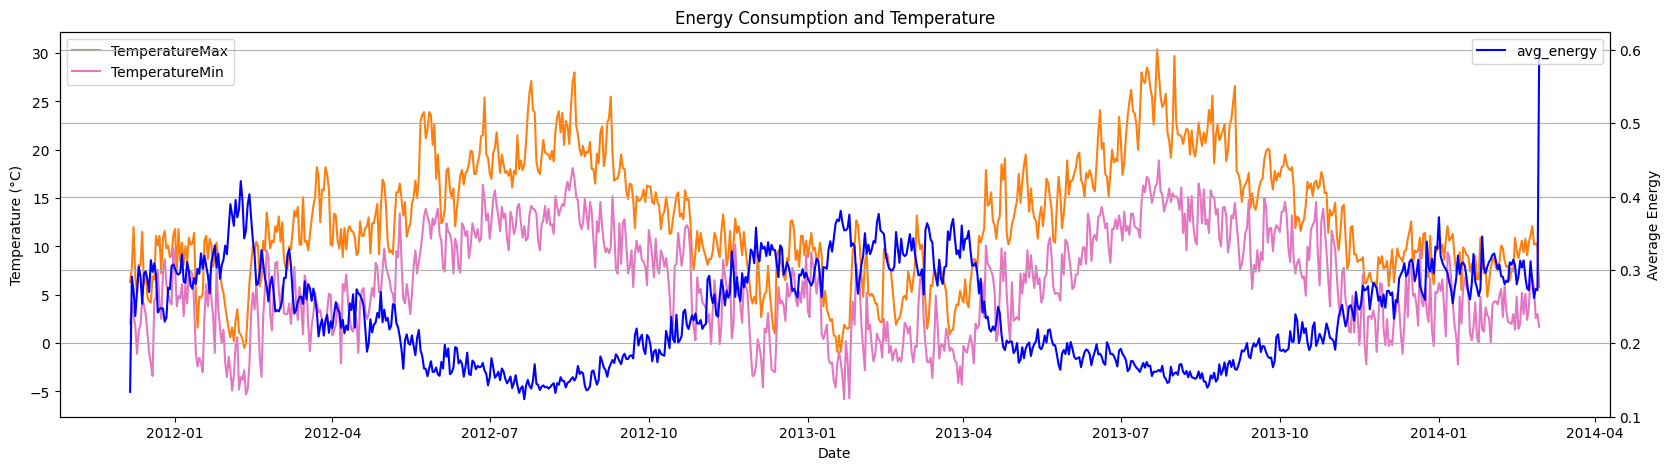

In [32]:
# Plotting
fig, ax1 = plt.subplots(figsize=(20, 5))

# Plot temperature data
ax1.plot(merged_df['DateTime'], merged_df['temperature_2m_max (°C)'], color='tab:orange', label='TemperatureMax')
ax1.plot(merged_df['DateTime'], merged_df['temperature_2m_min (°C)'], color='tab:pink', label='TemperatureMin')
ax1.set_xlabel('Date')
ax1.set_ylabel('Temperature (°C)')
ax1.legend(loc='upper left')
# Create a second y-axis for energy consumption
ax2 = ax1.twinx()
ax2.plot(merged_df['DateTime'], merged_df['KWH/hh'], color='blue', label='avg_energy')
ax2.set_ylabel('Average Energy')
ax2.legend(loc='upper right')
# Title and grid
plt.title('Energy Consumption and Temperature')
plt.grid()

plt.show()

##INTERPRETATION:
Temperature and energy consumption are negatively correlated.


In [34]:
# Select only numeric columns
numeric_cols = ['KWH/hh', 'temperature_2m_max (°C)', 'temperature_2m_min (°C)',
                'temperature_2m_mean (°C)', 'apparent_temperature_max (°C)',
                'apparent_temperature_min (°C)', 'apparent_temperature_mean (°C)',
                'daylight_duration (s)', 'sunshine_duration (s)', 'precipitation_sum (mm)',
                'rain_sum (mm)', 'precipitation_hours (h)', 'wind_speed_10m_max (km/h)',
                'wind_direction_10m_dominant (°)']
# Ensure these columns exist in your DataFrame
numeric_cols = [col for col in numeric_cols if col in merged_df.columns]

# Calculate the correlation matrix for numeric columns
cor_matrix = merged_df[numeric_cols].corr()

# Display the correlation matrix
cor_matrix

,KWH/hh,temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),apparent_temperature_mean (°C),daylight_duration (s),sunshine_duration (s),precipitation_sum (mm),rain_sum (mm),precipitation_hours (h),wind_speed_10m_max (km/h),wind_direction_10m_dominant (°)
KWH/hh,1.000000,-0.869756,-0.816039,-0.868058,-0.855757,-0.833178,-0.864389,-0.735779,-0.497972,0.016792,-0.011917,0.032123,0.189629,-0.077289
temperature_2m_max (°C),-0.869756,1.000000,0.894598,0.977098,0.986771,0.916613,0.974997,0.711614,0.519102,-0.023998,0.003744,-0.062285,-0.174945,0.048993
temperature_2m_min (°C),-0.816039,0.894598,1.000000,0.962562,0.880887,0.983757,0.943970,0.607499,0.294982,0.087779,0.109763,0.089189,-0.033887,0.057111
temperature_2m_mean (°C),-0.868058,0.977098,0.962562,1.000000,0.963083,0.968300,0.988623,0.679143,0.423533,0.029420,0.055442,0.008940,-0.105904,0.058786
apparent_temperature_max (°C),-0.855757,0.986771,0.880887,0.963083,1.000000,0.918234,0.981554,0.695558,0.483401,-0.019836,0.005647,-0.060509,-0.283784,0.033265
apparent_temperature_min (°C),-0.833178,0.916613,0.983757,0.968300,0.918234,1.000000,0.971503,0.626389,0.315900,0.050430,0.073097,0.045340,-0.162237,0.041777
apparent_temperature_mean (°C),-0.864389,0.974997,0.943970,0.988623,0.981554,0.971503,1.000000,0.676747,0.412358,0.006840,0.031284,-0.016908,-0.233203,0.043526
daylight_duration (s),-0.735779,0.711614,0.607499,0.679143,0.695558,0.626389,0.676747,1.000000,0.569410,-0.007848,0.004583,0.022657,-0.215213,-0.113012
sunshine_duration (s),-0.497972,0.519102,0.294982,0.423533,0.483401,0.315900,0.412358,0.569410,1.000000,-0.272082,-0.256838,-0.310973,-0.191417,-0.028753
precipitation_sum (mm),0.016792,-0.023998,0.087779,0.029420,-0.019836,0.050430,0.006840,-0.007848,-0.272082,1.000000,0.992501,0.829780,0.355347,-0.054112


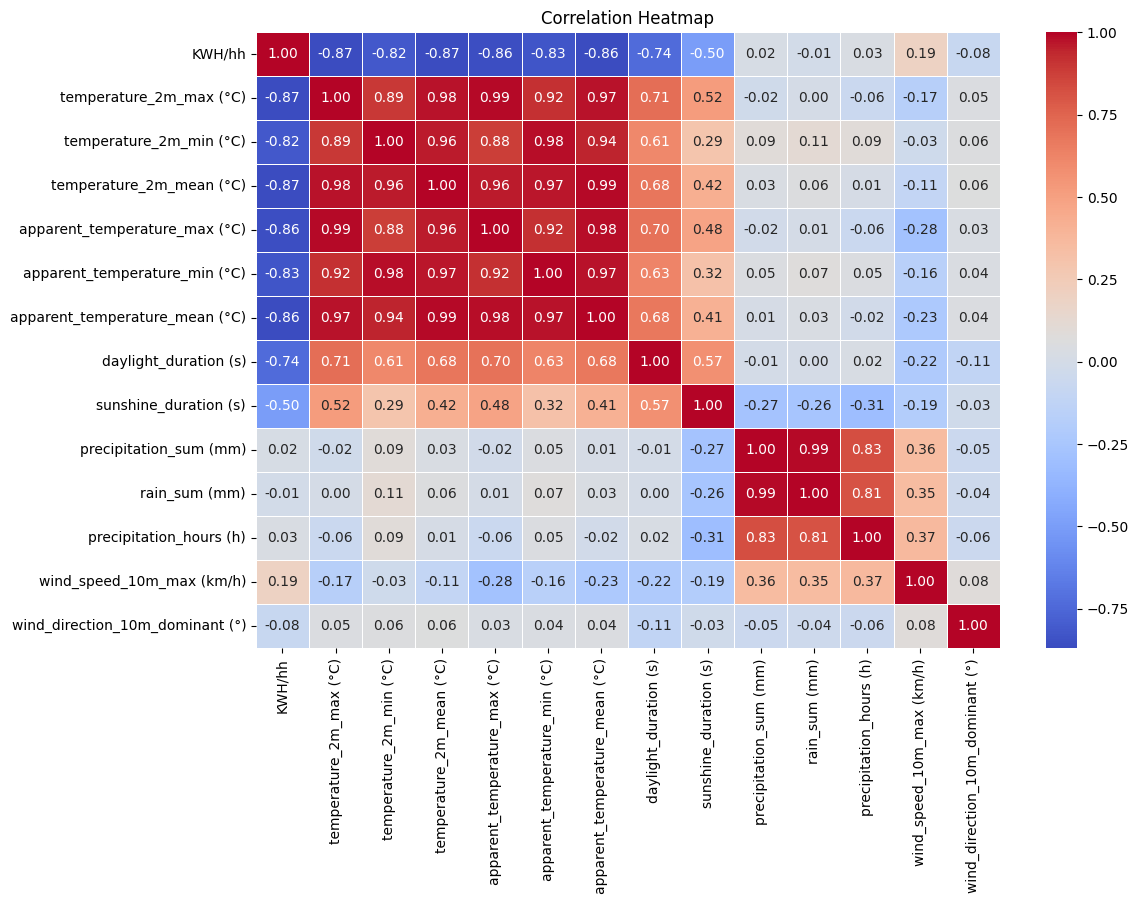

In [35]:
# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Draw the heatmap with the correlation matrix
sns.heatmap(cor_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Add title and labels
plt.title('Correlation Heatmap')
plt.show()

##Preparing for ARIMAX
Select the features you want to include in your model and normalize if necessary:

In [37]:
from sklearn.preprocessing import StandardScaler

# Features for ARIMAX
features = ['temperature_2m_max (°C)', 'temperature_2m_min (°C)',
            'temperature_2m_mean (°C)', 'apparent_temperature_max (°C)',
            'apparent_temperature_min (°C)', 'apparent_temperature_mean (°C)',
            'daylight_duration (s)', 'sunshine_duration (s)',
            'precipitation_sum (mm)', 'rain_sum (mm)',
            'precipitation_hours (h)', 'wind_speed_10m_max (km/h)',
            'wind_direction_10m_dominant (°)']

# Normalize features
scaler = StandardScaler()
merged_df[features] = scaler.fit_transform(merged_df[features])

# Prepare target and exogenous variables
y = merged_df['KWH/hh']
X = merged_df[features]

##Dividing data into train and splits sets using 80-20 ratio.

In [38]:
# Determine the split point (e.g., 80% train, 20% test)
split_ratio = 0.8
split_point = int(len(merged_df) * split_ratio)

# Split the data into train and test sets
train_data = merged_df.iloc[:split_point]
test_data = merged_df.iloc[split_point:]

# Verify the split
print(f"Training set size: {len(train_data)}")
print(f"Test set size: {len(test_data)}")

Training set size: 652
Test set size: 164


##Selecting the appropriate hyperparameters (p,d,q) for an ARIMAX model typically involves a combination of domain knowledge, statistical tests, and empirical methods. Here are some common approaches to determine these hyperparameters:

1. Visual Inspection using ACF and PACF Plots
Autocorrelation Function (ACF): Helps to determine the value of
q (order of the Moving Average part).
Partial Autocorrelation Function (PACF): Helps to determine the value of
p (order of the Auto-Regressive part).
2. Differencing
Differencing: Helps to determine the value of
d (the number of differences needed to make the series stationary).
3. Grid Search with Cross-Validation
Use grid search over a range of values for
p,
d, and
q to find the combination that minimizes the AIC (Akaike Information Criterion) or BIC (Bayesian Information Criterion).

##Interpretation of ACF and PACF Plots
Determining
p (AR order):

Look at the PACF plot. Find the point (lag) where the plot first drops to zero or becomes insignificant.
The lag at which the PACF plot cuts off is the value of
p.
Determining
q (MA order):

Look at the ACF plot. Find the point (lag) where the plot first drops to zero or becomes insignificant.
The lag at which the ACF plot cuts off is the value of
q.

In [47]:
train_data.head()

,DateTime,KWH/hh,time,weather_code (wmo code),temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),apparent_temperature_mean (°C),sunrise (iso8601),sunset (iso8601),daylight_duration (s),sunshine_duration (s),precipitation_sum (mm),rain_sum (mm),precipitation_hours (h),wind_speed_10m_max (km/h),wind_direction_10m_dominant (°)
0,2011-12-06,0.133955,2011-12-06,3,-1.077834,-0.829907,-1.015967,-1.100369,-0.965862,-1.077597,2011-12-06T08:50,2011-12-06T16:52,-1.265928,-0.445703,-0.572493,-0.559852,-0.781330,-0.106588,0.577979
1,2011-12-07,0.290976,2011-12-07,51,-0.832945,-0.410090,-0.619415,-1.100369,-0.637208,-0.902739,2011-12-07T08:51,2011-12-07T16:52,-1.274279,-0.021172,-0.545886,-0.533099,-0.584490,1.402295,0.707815
2,2011-12-08,0.272340,2011-12-08,53,-0.147254,-0.677246,-0.312988,-0.557310,-0.746759,-0.567593,2011-12-08T08:52,2011-12-08T16:52,-1.282130,-1.399382,-0.200004,-0.185306,0.006031,2.248742,0.329126
3,2011-12-09,0.237201,2011-12-09,1,-0.979878,-0.868073,-0.907816,-1.113615,-0.903261,-1.063026,2011-12-09T08:53,2011-12-09T16:52,-1.289499,-0.035162,-0.572493,-0.559852,-0.781330,0.653988,0.642897
4,2011-12-10,0.269921,2011-12-10,1,-1.257420,-1.421469,-1.484620,-1.166596,-1.325816,-1.354456,2011-12-10T08:54,2011-12-10T16:51,-1.296373,-0.046724,-0.572493,-0.559852,-0.781330,-0.977569,0.534700


In [45]:
test_data.head()

,DateTime,KWH/hh,time,weather_code (wmo code),temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),apparent_temperature_mean (°C),sunrise (iso8601),sunset (iso8601),daylight_duration (s),sunshine_duration (s),precipitation_sum (mm),rain_sum (mm),precipitation_hours (h),wind_speed_10m_max (km/h),wind_direction_10m_dominant (°)
652,2013-09-18,0.199563,2013-09-18,3,0.309873,0.620373,0.480118,0.290391,0.520906,0.466986,2013-09-18T06:40,2013-09-18T19:08,0.183489,0.276513,-0.572493,-0.559852,-0.781330,-0.180192,1.140603
653,2013-09-19,0.206813,2013-09-19,53,0.522111,0.200555,0.426042,0.648015,0.239202,0.408699,2013-09-19T06:42,2013-09-19T19:06,0.161973,-0.796066,-0.226610,-0.212059,-0.190809,0.887067,0.448142
654,2013-09-20,0.188217,2013-09-20,3,0.636393,0.582207,0.678394,0.727487,0.599157,0.743845,2013-09-20T06:44,2013-09-20T19:03,0.140472,0.955544,-0.572493,-0.559852,-0.781330,-0.830361,0.880931
655,2013-09-21,0.196374,2013-09-21,51,0.669045,0.429546,0.696419,0.912922,0.599157,0.860417,2013-09-21T06:45,2013-09-21T19:01,0.119000,-1.469292,-0.545886,-0.533099,-0.584490,-0.634083,0.253388
656,2013-09-22,0.195649,2013-09-22,3,0.995564,1.650835,1.291248,1.283791,1.882472,1.574422,2013-09-22T06:47,2013-09-22T18:59,0.097566,-1.363397,-0.572493,-0.559852,-0.781330,-1.247450,0.632077


<Figure size 1200x600 with 0 Axes>

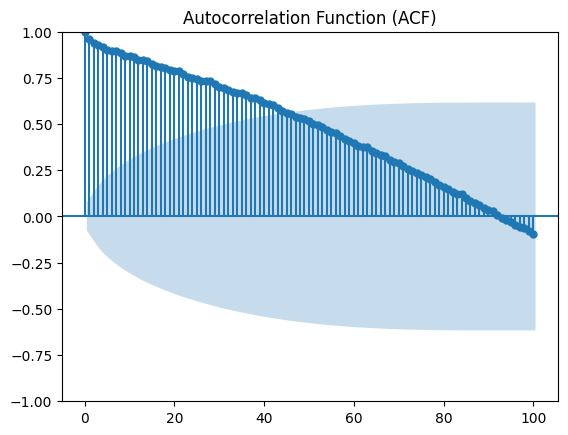

<Figure size 1200x600 with 0 Axes>

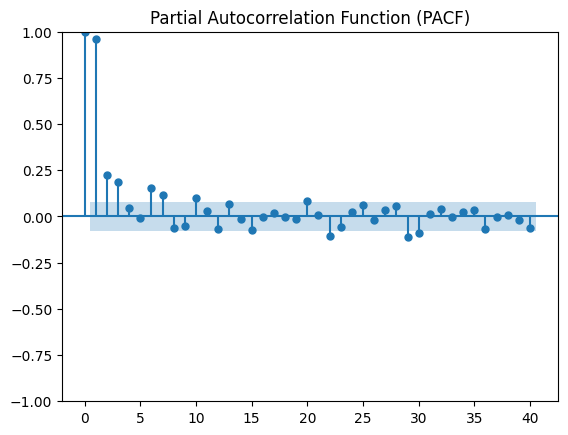

In [49]:
# Apply ACF and PACF on the training data
train_values = train_data['KWH/hh']

# Plot ACF
plt.figure(figsize=(12, 6))
plot_acf(train_values, lags=100)
plt.title('Autocorrelation Function (ACF)')
plt.show()

# Plot PACF
plt.figure(figsize=(12, 6))
plot_pacf(train_values, lags=40)
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()


Autocorrelation plot shows gradual decay while Partial AutoCorrelation shows that there is a sharp drop after 1st lag. This means that most of the higher-order autocorrelations are effectively explained by the k = 1 lag. Therefore, the series displays AR 'signature'

p (the number of lag observations included in the model): Since the PACF drops sharply after lag 1,
=
1
p=1.

q (the size of the moving average window): Since the ACF shows a gradual decay, it does not suggest a strong moving average (MA) component, implying that
=
0
q=0 might be sufficient.

#Now for hyperparameter 'd'.

In [53]:
#First applying Augmented Dickey-Fuller test on original data
from statsmodels.tsa.stattools import adfuller
train_values = train_data['KWH/hh']
# Perform Augmented Dickey-Fuller test
result = adfuller(train_values)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -1.737644
p-value: 0.411829


As p-value> 0.05. So , we fail to reject null hypothesis and conclude that series is non-stationary. To make it stationary we use differencing.

In [57]:
## FirstDifferencing
# Apply first differencing on the training data
y = train_data['KWH/hh']
y_diff1 = y.diff().dropna()
result_diff1 = adfuller(y_diff1)
print('ADF Statistic (1st Diff): %f' % result_diff1[0])
print('p-value (1st Diff): %f' % result_diff1[1])

ADF Statistic (1st Diff): -5.593968
p-value (1st Diff): 0.000001


##Interpretation##


##Comparison with Critical Values:

-5.439534 < -3.50 (1% level)

-5.439534 < -2.89 (5% level)

-5.439534 < -2.58 (10% level)

Since -5.439534 is less than all these critical values, you can reject the null hypothesis at the 1%, 5%, and 10% significance levels.
## As p-value is less than 0.05 so no more differencing needed, and d=1.

#So hyperparameters are (p, d ,q) = (1,1,0)

                               SARIMAX Results                                
Dep. Variable:                 KWH/hh   No. Observations:                  652
Model:                 ARIMA(1, 1, 0)   Log Likelihood                1673.823
Date:                Wed, 24 Jul 2024   AIC                          -3343.646
Time:                        16:05:11   BIC                          -3334.689
Sample:                             0   HQIC                         -3340.172
                                - 652                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2057      0.036     -5.685      0.000      -0.277      -0.135
sigma2         0.0003   9.61e-06     35.589      0.000       0.000       0.000
Ljung-Box (L1) (Q):                   0.15   Jarque-

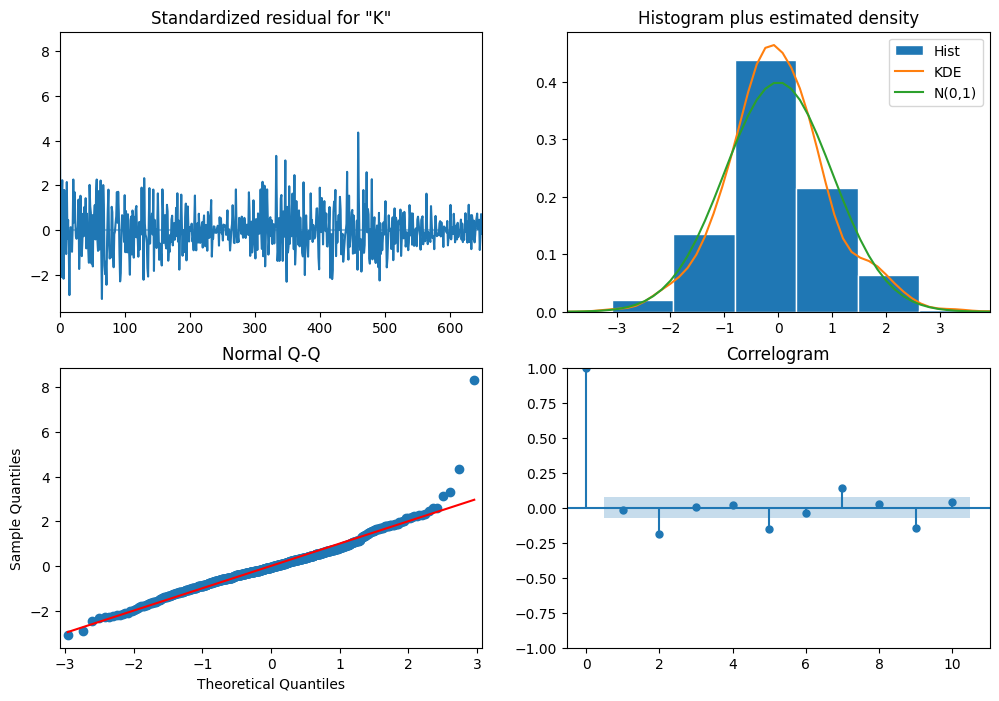

In [60]:
from statsmodels.tsa.arima.model import ARIMA

# Assuming d = 1 based on the ADF test results
model = ARIMA(train_data['KWH/hh'], order=(1, 1, 0))
model_fit = model.fit()

# Summarize the model
print(model_fit.summary())

# Plot diagnostics
model_fit.plot_diagnostics(figsize=(12, 8))
plt.show()

Ljung-Box (L1) (Q): This test checks for autocorrelation in the residuals.

Statistic (Q): 0.15
Prob(Q): 0.70
A p-value of 0.70 suggests that there is no significant autocorrelation in the residuals, which is a good sign.
Jarque-Bera (JB) test: This test checks for normality in the residuals.

Statistic (JB): 1673.93
Prob(JB): 0.00
A p-value of 0.00 indicates that the residuals are not normally distributed. This might be an issue and can sometimes be addressed by transforming the data or using a different model.
Heteroskedasticity (H) test: This test checks for constant variance in the residuals.

Statistic (H): 0.43
Prob(H): 0.00
A p-value of 0.00 suggests that there is heteroskedasticity, meaning the variance of the residuals is not constant over time. This might also indicate the need for model adjustment.

**Another method of finding hyperparameters is grid search.**

In [125]:
#grid search
import itertools
import statsmodels.api as sm

# Define the range for p, d, and q
p = d = q = range(0, 7)
pdq = list(itertools.product(p, d, q))
y1 = train_data['KWH/hh']
X1 = train_data[features]
# Find the best combination of parameters
best_aic = float("inf")
best_order = None
best_model = None

for order in pdq:
    try:
        model = sm.tsa.ARIMA(y1, order=order, exog=X1)
        model_fit = model.fit()
        aic = model_fit.aic
        if aic < best_aic:
            best_aic = aic
            best_order = order
            best_model = model_fit
    except:
        continue

print(f"Best AIC: {best_aic}")
print(f"Best Order: {best_order}")

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood op

Best AIC: -3502.946293450998
Best Order: (2, 1, 6)


#According to grid selection (p, d, q) = (2, 1, 6)

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                 KWH/hh   No. Observations:                  652
Model:                 ARIMA(2, 1, 6)   Log Likelihood                1721.011
Date:                Wed, 24 Jul 2024   AIC                          -3424.022
Time:                        20:12:13   BIC                          -3383.716
Sample:                             0   HQIC                         -3408.389
                                - 652                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4328      0.010    -41.869      0.000      -0.453      -0.413
ar.L2         -0.9819      0.009   -107.973      0.000      -1.000      -0.964
ma.L1          0.1589      0.037      4.289      0.0

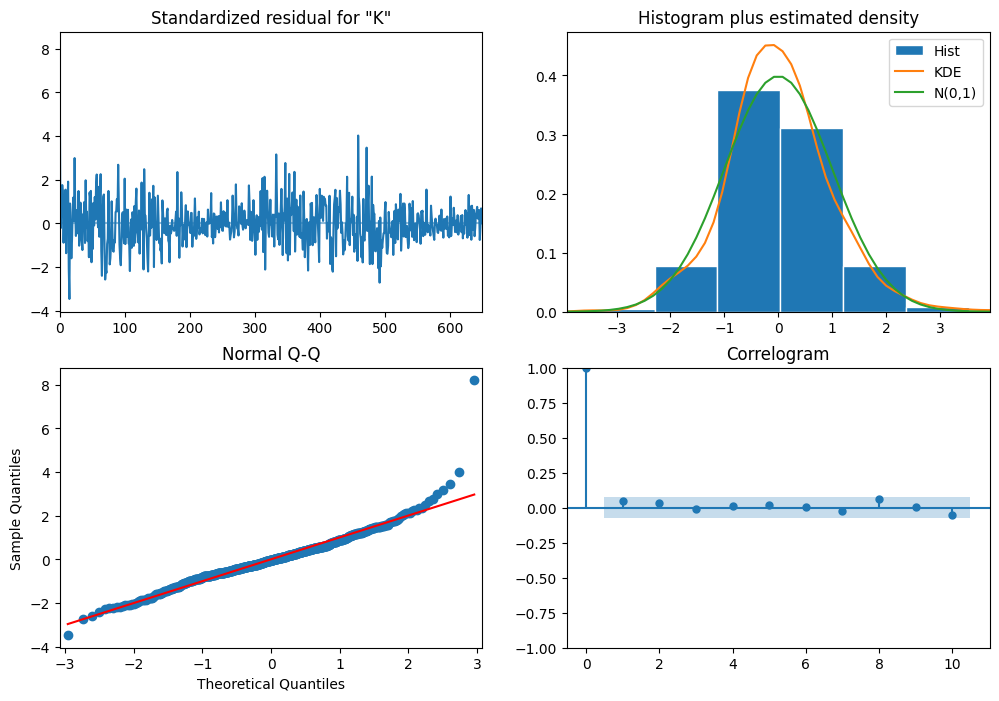

In [127]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train_data['KWH/hh'], order=(2, 1, 6))
model_fit = model.fit()

# Summarize the model
print(model_fit.summary())

# Plot diagnostics
model_fit.plot_diagnostics(figsize=(12, 8))
plt.show()

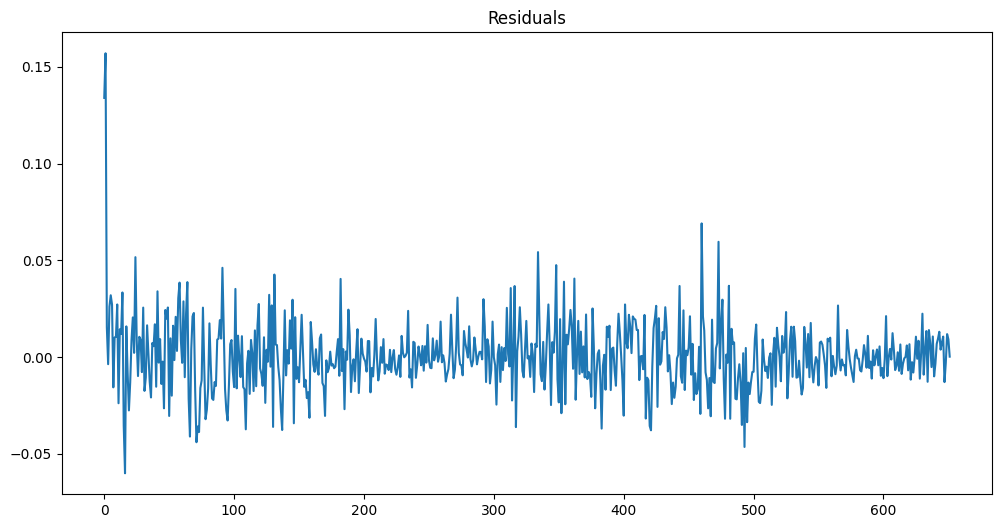

<Figure size 1200x600 with 0 Axes>

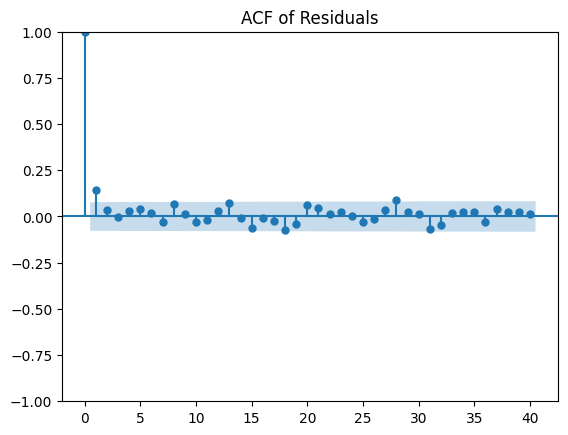

<Figure size 1200x600 with 0 Axes>

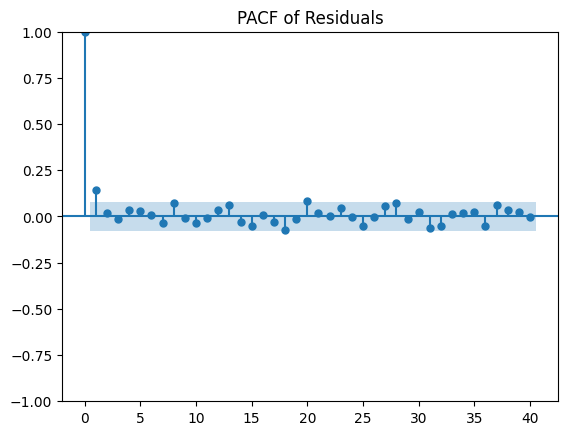

In [128]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot residuals
residuals = model_fit.resid

plt.figure(figsize=(12, 6))
plt.plot(residuals)
plt.title('Residuals')
plt.show()

# Plot ACF and PACF of residuals
plt.figure(figsize=(12, 6))
plot_acf(residuals, lags=40)
plt.title('ACF of Residuals')
plt.show()

plt.figure(figsize=(12, 6))
plot_pacf(residuals, lags=40)
plt.title('PACF of Residuals')
plt.show()


ACF Plot:

The ACF plot shows that most of the autocorrelations fall within the confidence interval, suggesting that there is no significant autocorrelation left in the residuals, which is a good sign.
There might be a few lags just at or slightly outside the confidence bounds, but they do not appear to be a consistent pattern of significant lags.
PACF Plot:

The PACF plot also shows that most of the partial autocorrelations fall within the confidence interval.
There is no clear pattern of significant lags, indicating that the residuals do not show significant partial autocorrelation.
Conclusion
The ACF and PACF plots of the residuals suggest that the ARIMA model has done a good job in capturing the underlying data pattern, as the residuals appear to be uncorrelated.
Since the residuals do not exhibit significant autocorrelation, it indicates that the model does not have systematic patterns left unmodeled, which is a desirable outcome.

**Applying ARIMA without log transformation**

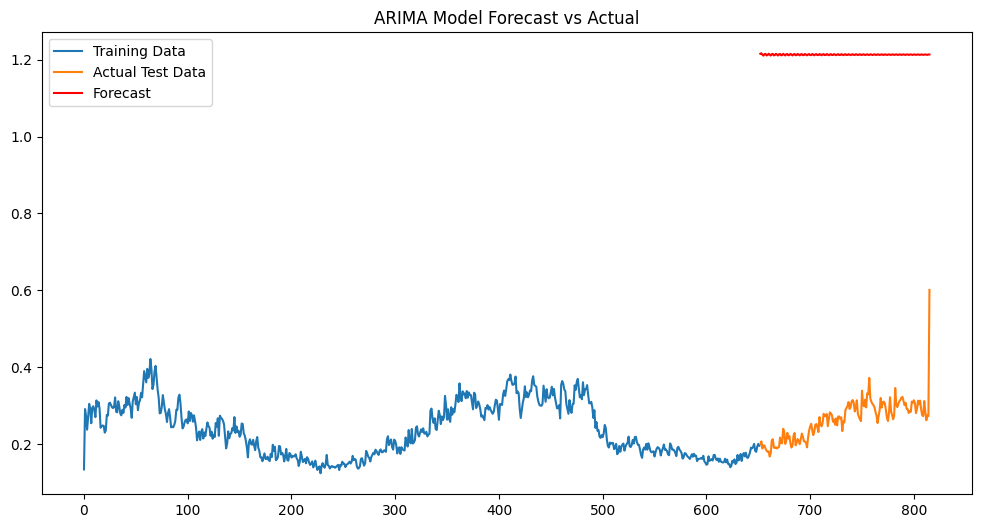

Mean Absolute Error (MAE): 0.9499196489966069
Root Mean Squared Error (RMSE): 0.9513153428131302
Mean Absolute Percentage Error (MAPE): 377.46%


In [129]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
y1 = train_data['KWH/hh']
X1 = train_data[features]


# Forecasting
n_periods = len(test_data)
forecast_log = model_fit.forecast(steps=n_periods)

# Transform forecast back to original scale
forecast_series = np.exp(forecast_log)  # if log transformation was used
forecast_series = pd.Series(forecast_series, index=test_data.index)

# Plotting the forecast against actual values
plt.figure(figsize=(12, 6))
plt.plot(train_data['KWH/hh'], label='Training Data')
plt.plot(test_data['KWH/hh'], label='Actual Test Data')
plt.plot(forecast_series, label='Forecast', color='red')
plt.legend(loc='upper left')
plt.title('ARIMA Model Forecast vs Actual')
plt.show()

# Calculate MAE and RMSE
mae = mean_absolute_error(test_data['KWH/hh'], forecast_series)
rmse = mean_squared_error(test_data['KWH/hh'], forecast_series, squared=False)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Calculate MAPE
mape = np.mean(np.abs((test_data['KWH/hh'] - forecast_series) / test_data['KWH/hh'])) * 100
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')


**Applying ARIMA with log transformation.**

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


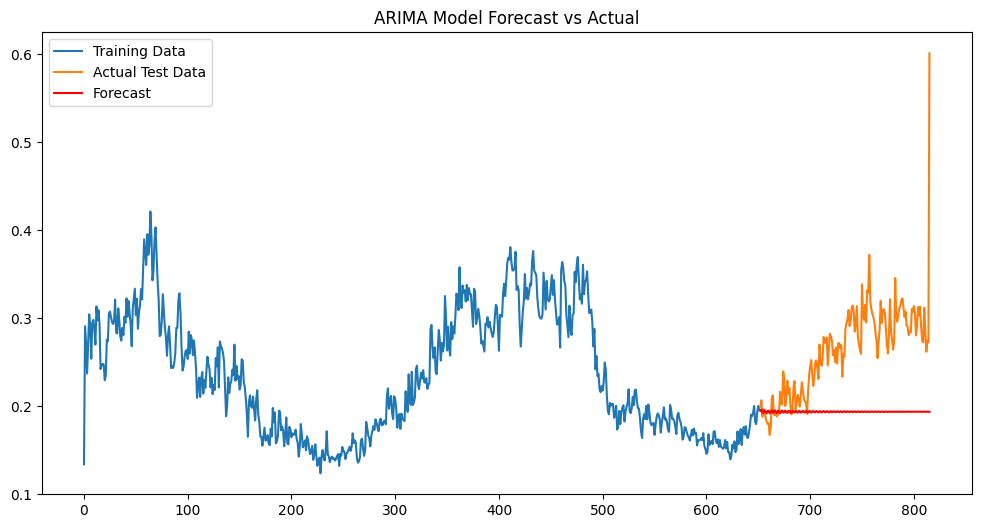

Mean Absolute Error (MAE): 0.07105307336114988
Root Mean Squared Error (RMSE): 0.08664519126829642
Mean Absolute Percentage Error (MAPE): 24.54%


In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
# Log transform using .loc to avoid SettingWithCopyWarning
train_data.loc[:, 'log_KWH/hh'] = np.log(train_data['KWH/hh'])
test_data.loc[:, 'log_KWH/hh'] = np.log(test_data['KWH/hh'])


# Set ARIMA model parameters (p, d, q)
p, d, q = 2, 1, 6

# Fit ARIMA model
model = ARIMA(train_data['log_KWH/hh'], order=(p, d, q))
model_fit = model.fit()

# Forecast
n_periods = len(test_data)
forecast_log = model_fit.forecast(steps=n_periods)

# Back-transform
forecast = np.exp(forecast_log)
forecast_series = pd.Series(forecast, index=test_data.index)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(train_data['KWH/hh'], label='Training Data')
plt.plot(test_data['KWH/hh'], label='Actual Test Data')
plt.plot(forecast_series, label='Forecast', color='red')
plt.legend(loc='upper left')
plt.title('ARIMA Model Forecast vs Actual')
plt.show()

# Calculate MAE, RMSE, MAPE
mae = mean_absolute_error(test_data['KWH/hh'], forecast_series)
rmse = mean_squared_error(test_data['KWH/hh'], forecast_series, squared=False)
mape = np.mean(np.abs((test_data['KWH/hh'] - forecast_series) / test_data['KWH/hh'])) * 100

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')


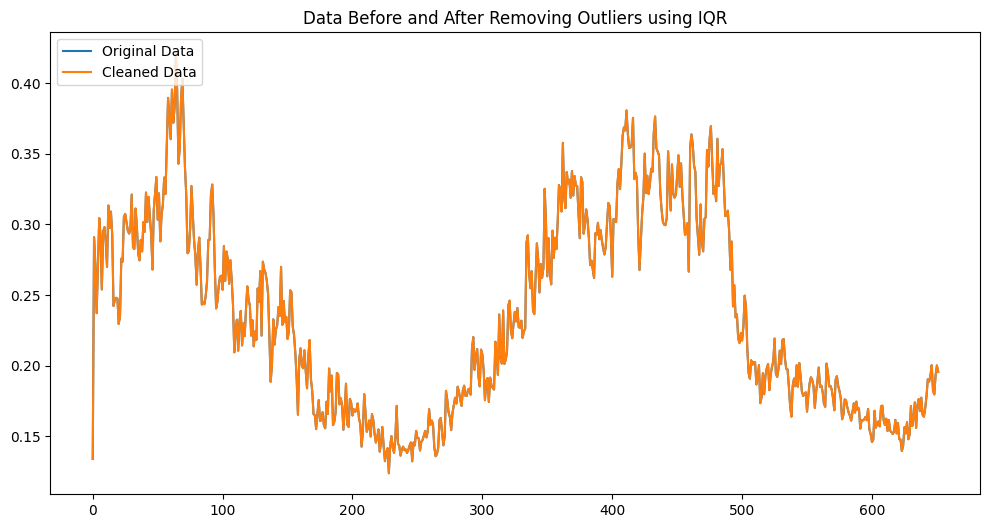

In [135]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = train_data['KWH/hh'].quantile(0.25)
Q3 = train_data['KWH/hh'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 3 * IQR
upper_bound = Q3 + 3 * IQR

# Filter the outliers
train_data_cleaned = train_data[(train_data['KWH/hh'] >= lower_bound) & (train_data['KWH/hh'] <= upper_bound)]

# Plot the cleaned data
plt.figure(figsize=(12, 6))
plt.plot(train_data['KWH/hh'], label='Original Data')
plt.plot(train_data_cleaned['KWH/hh'], label='Cleaned Data')
plt.legend(loc='upper left')
plt.title('Data Before and After Removing Outliers using IQR')
plt.show()


#**Check for seasonality.**

Time Series Plot:
Plot the time series data and visually inspect for repeating patterns at regular intervals.

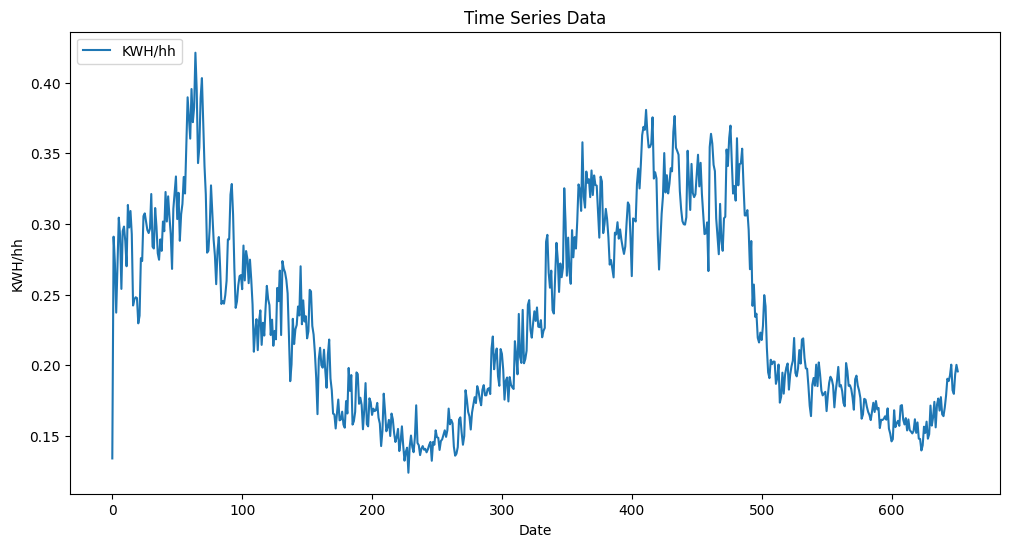

In [138]:
plt.figure(figsize=(12, 6))
plt.plot(train_data['KWH/hh'], label='KWH/hh')
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('KWH/hh')
plt.legend(loc='upper left')
plt.show()


Seasonal Decomposition of Time Series (STL):
Decompose the time series into trend, seasonal, and residual components.

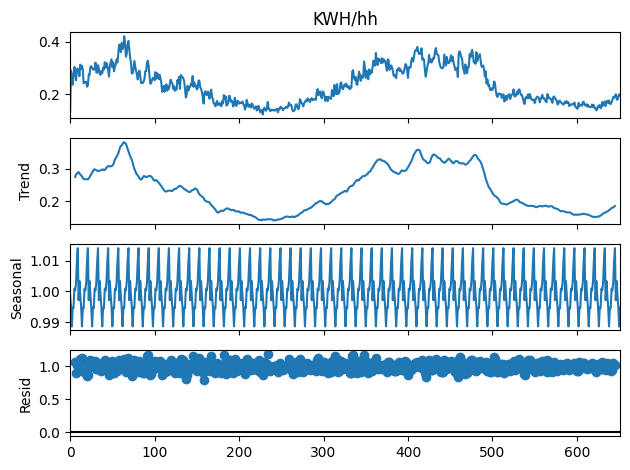

In [139]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
result = seasonal_decompose(train_data['KWH/hh'], model='multiplicative', period=12)  # Adjust the period according to your data frequency
result.plot()
plt.show()


Fourier Transform:
Fourier transform can be used to detect dominant frequencies (seasonal cycles) in the data.

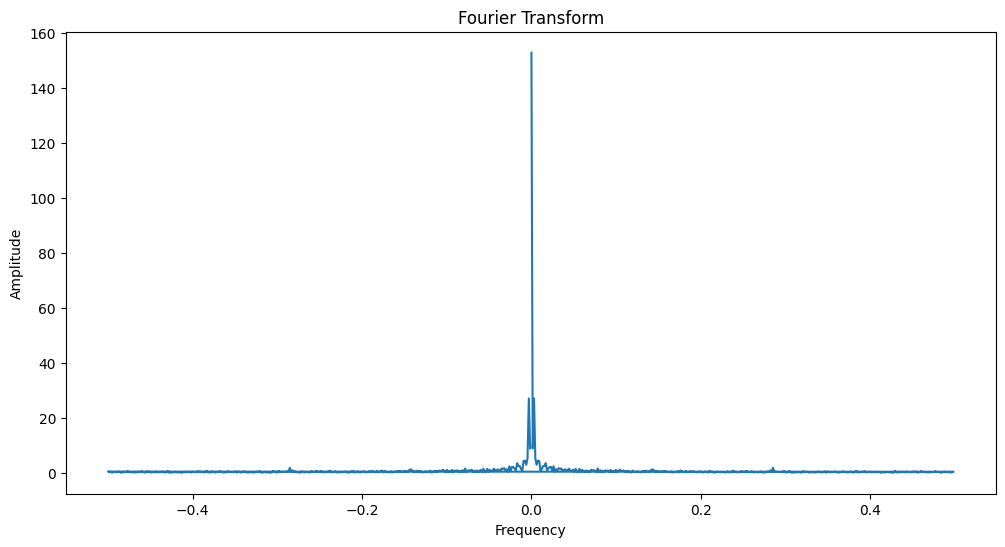

In [140]:
import numpy as np

# Perform Fourier Transform
fft = np.fft.fft(train_data['KWH/hh'])
fft_freq = np.fft.fftfreq(len(train_data['KWH/hh']))

# Plot the FFT result
plt.figure(figsize=(12, 6))
plt.plot(fft_freq, np.abs(fft))
plt.title('Fourier Transform')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.show()


Seasonal Differencing:
Difference the data at the seasonal lag (e.g., 12 for monthly data) to remove seasonality and check for stationarity.

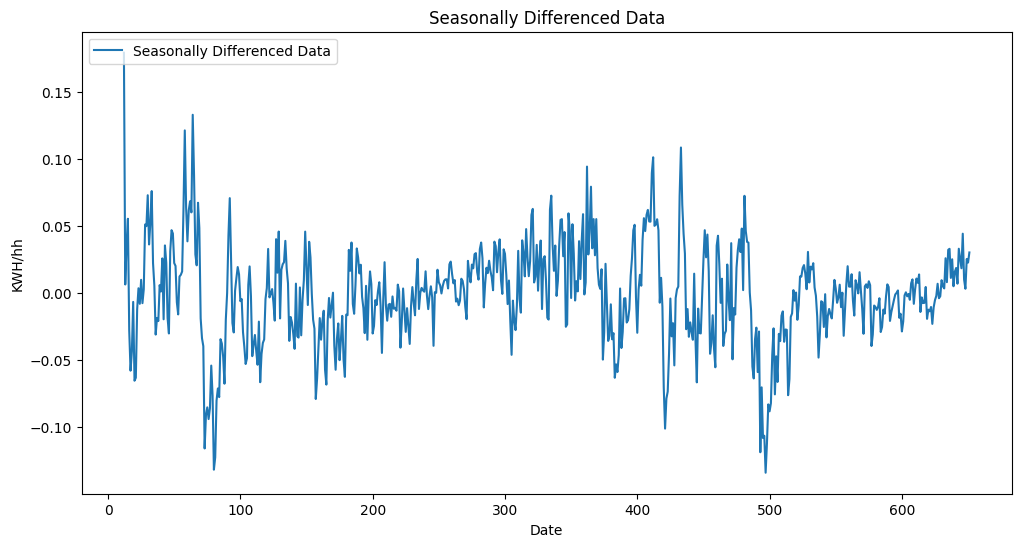

In [141]:
seasonal_diff = train_data['KWH/hh'].diff(12).dropna()

plt.figure(figsize=(12, 6))
plt.plot(seasonal_diff, label='Seasonally Differenced Data')
plt.title('Seasonally Differenced Data')
plt.xlabel('Date')
plt.ylabel('KWH/hh')
plt.legend(loc='upper left')
plt.show()


Augmented Dickey-Fuller Test:
Apply the ADF test on the seasonally differenced data to check for stationarity.

In [142]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(seasonal_diff)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])


ADF Statistic: -4.341426
p-value: 0.000376


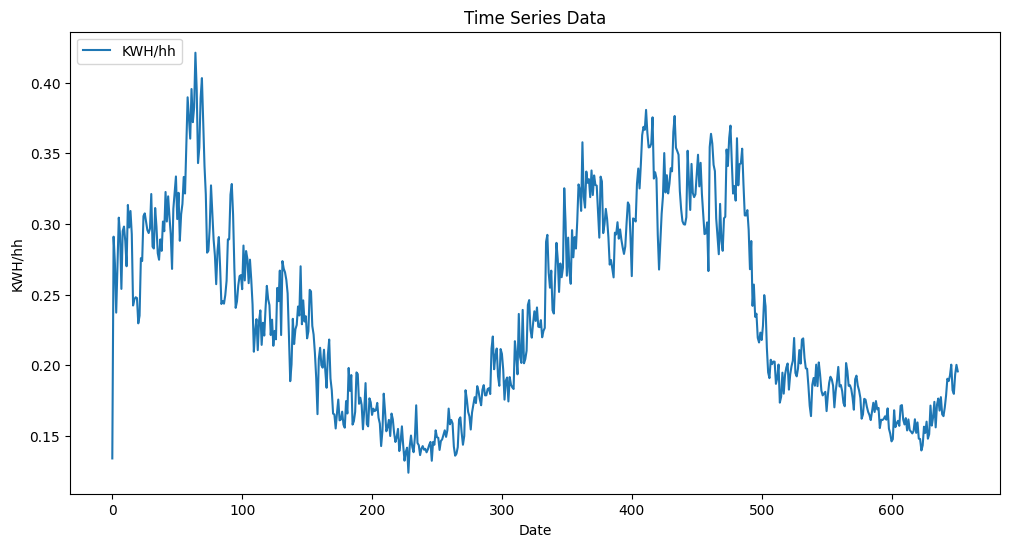

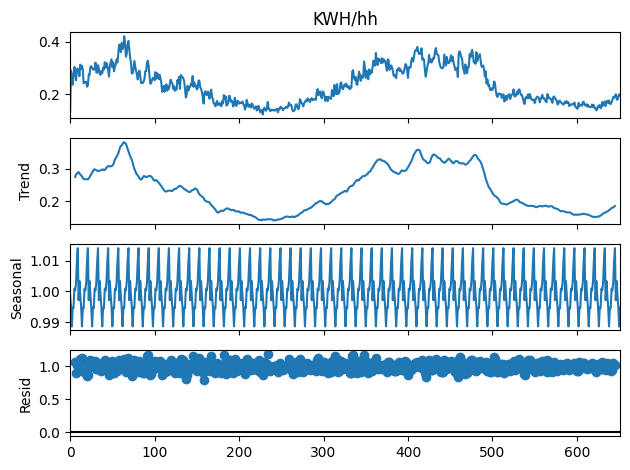

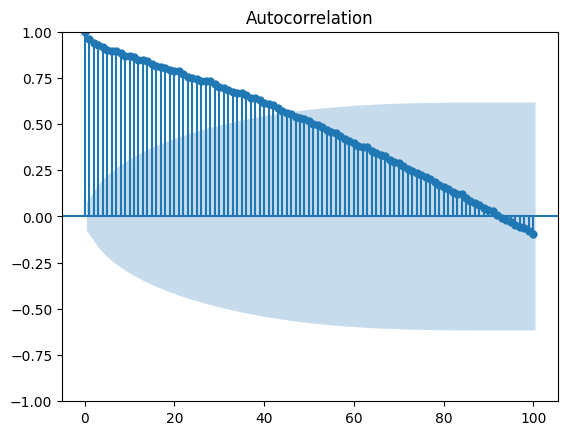

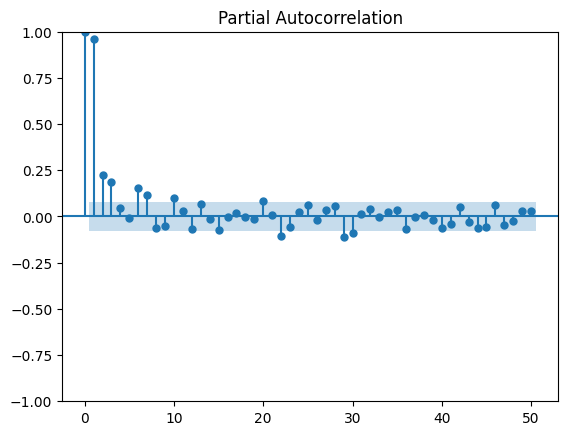

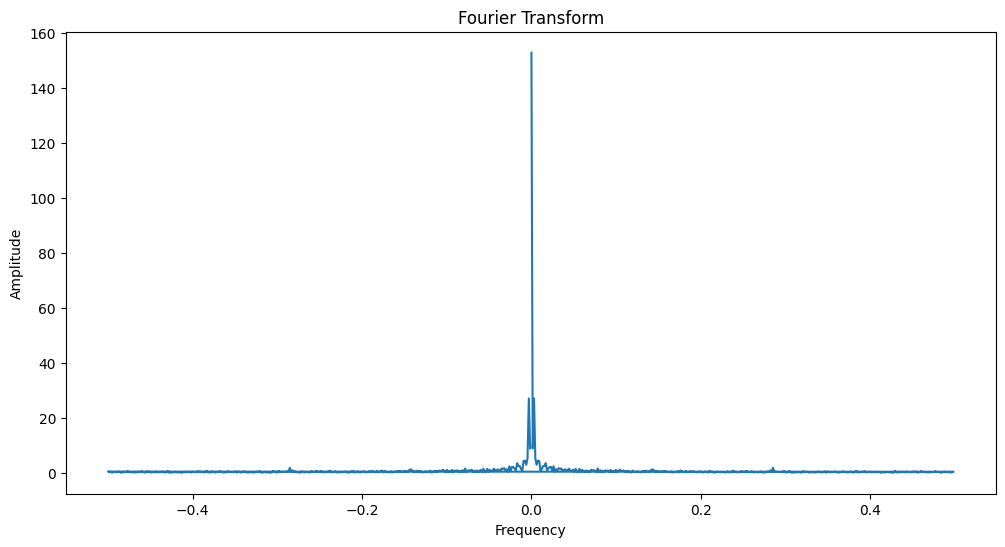

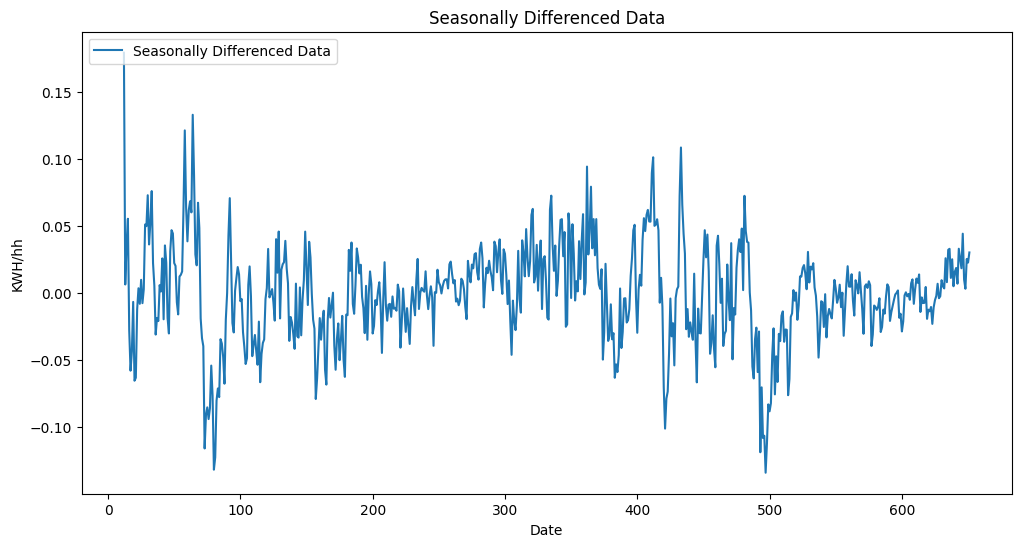

ADF Statistic: -4.341426
p-value: 0.000376


In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(train_data['KWH/hh'], label='KWH/hh')
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('KWH/hh')
plt.legend(loc='upper left')
plt.show()

# Seasonal Decomposition
result = seasonal_decompose(train_data['KWH/hh'], model='multiplicative', period=12)
result.plot()
plt.show()

# ACF and PACF plots
plot_acf(train_data['KWH/hh'], lags=100)
plt.show()

plot_pacf(train_data['KWH/hh'], lags=50)
plt.show()

# Fourier Transform
fft = np.fft.fft(train_data['KWH/hh'])
fft_freq = np.fft.fftfreq(len(train_data['KWH/hh']))

plt.figure(figsize=(12, 6))
plt.plot(fft_freq, np.abs(fft))
plt.title('Fourier Transform')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.show()

# Seasonal Differencing
seasonal_diff = train_data['KWH/hh'].diff(12).dropna()

plt.figure(figsize=(12, 6))
plt.plot(seasonal_diff, label='Seasonally Differenced Data')
plt.title('Seasonally Differenced Data')
plt.xlabel('Date')
plt.ylabel('KWH/hh')
plt.legend(loc='upper left')
plt.show()

# ADF test on seasonally differenced data
result = adfuller(seasonal_diff)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


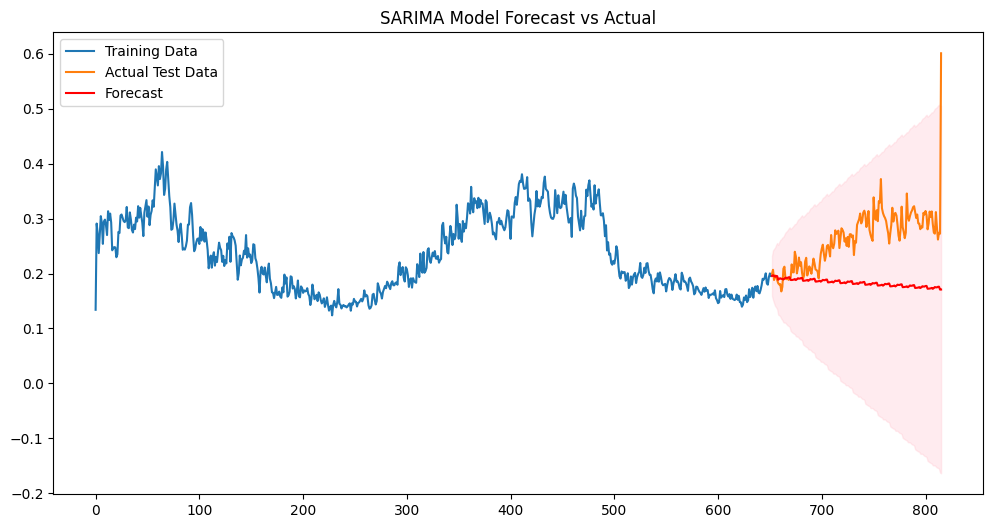

Mean Absolute Error (MAE): 0.08163050248911138
Root Mean Squared Error (RMSE): 0.09822388309406617
Mean Absolute Percentage Error (MAPE): 28.29%


In [148]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import numpy as np

# Define the model
p, d, q = 0, 1, 2  # These are from previous ARIMA fitting
P, D, Q, s = 1, 1, 1, 12  # Seasonal parameters and seasonal period

model = SARIMAX(train_data['KWH/hh'], order=(p, d, q), seasonal_order=(P, D, Q, s))
model_fit = model.fit()

# Forecast
n_periods = len(test_data)
forecast = model_fit.get_forecast(steps=n_periods)
forecast_values = forecast.predicted_mean
conf_int = forecast.conf_int()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(train_data['KWH/hh'], label='Training Data')
plt.plot(test_data['KWH/hh'], label='Actual Test Data')
plt.plot(forecast_values, label='Forecast', color='red')
plt.fill_between(test_data.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.legend(loc='upper left')
plt.title('SARIMA Model Forecast vs Actual')
plt.show()

# Evaluate the forecast
mae = mean_absolute_error(test_data['KWH/hh'], forecast_values)
rmse = mean_squared_error(test_data['KWH/hh'], forecast_values, squared=False)
mape = np.mean(np.abs((test_data['KWH/hh'] - forecast_values) / test_data['KWH/hh'])) * 100

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')


#Hyperparameter tuning for SARIMA using Grid search

Best SARIMA parameters: (2, 1, 1) x (0, 0, 0, 12) with AIC: -3432.897220659849


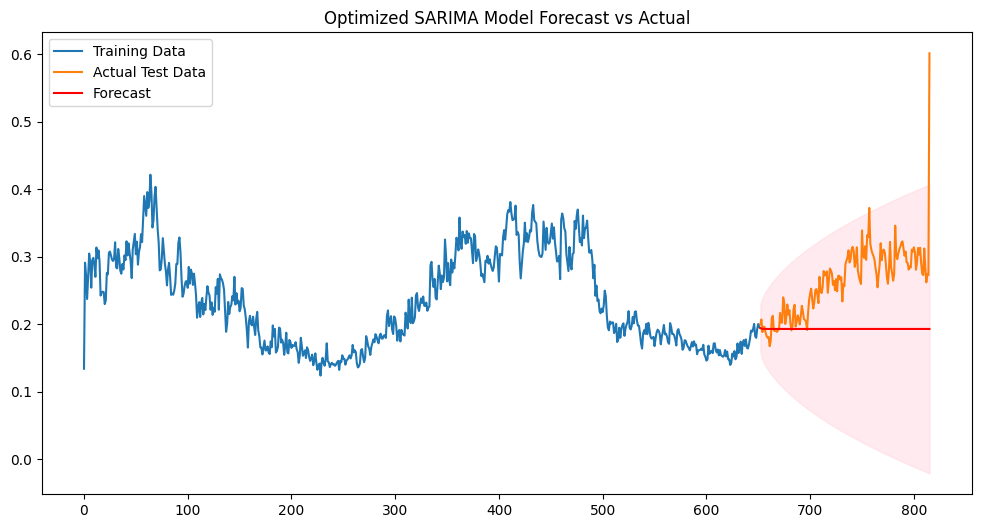

Mean Absolute Error (MAE): 0.0718103455095553
Root Mean Squared Error (RMSE): 0.08736038008508011
Mean Absolute Percentage Error (MAPE): 24.82%


In [149]:
import itertools
import warnings
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Define the p, d, q, P, D, Q parameters to take any value between 0 and 2
p = d = q = range(0, 3)
P = D = Q = range(0, 3)
s = [12]  # Seasonality period

# Generate all different combinations of p, d, q triplets
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], s[0]) for x in list(itertools.product(P, D, Q))]

best_aic = float('inf')
best_param = None
best_seasonal_param = None

warnings.filterwarnings("ignore")  # specify to ignore warning messages

for param in pdq:
    for seasonal_param in seasonal_pdq:
        try:
            mod = SARIMAX(train_data['KWH/hh'],
                          order=param,
                          seasonal_order=seasonal_param,
                          enforce_stationarity=False,
                          enforce_invertibility=False)

            results = mod.fit()

            if results.aic < best_aic:
                best_aic = results.aic
                best_param = param
                best_seasonal_param = seasonal_param

        except:
            continue

print(f'Best SARIMA parameters: {best_param} x {best_seasonal_param} with AIC: {best_aic}')

# Fit the best model
best_model = SARIMAX(train_data['KWH/hh'],
                     order=best_param,
                     seasonal_order=best_seasonal_param,
                     enforce_stationarity=False,
                     enforce_invertibility=False)

best_model_fit = best_model.fit()

# Forecast
n_periods = len(test_data)
forecast = best_model_fit.get_forecast(steps=n_periods)
forecast_values = forecast.predicted_mean
conf_int = forecast.conf_int()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(train_data['KWH/hh'], label='Training Data')
plt.plot(test_data['KWH/hh'], label='Actual Test Data')
plt.plot(forecast_values, label='Forecast', color='red')
plt.fill_between(test_data.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.legend(loc='upper left')
plt.title('Optimized SARIMA Model Forecast vs Actual')
plt.show()

# Evaluate the forecast
mae = mean_absolute_error(test_data['KWH/hh'], forecast_values)
rmse = mean_squared_error(test_data['KWH/hh'], forecast_values, squared=False)
mape = np.mean(np.abs((test_data['KWH/hh'] - forecast_values) / test_data['KWH/hh'])) * 100

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')


<ipython-input-126-eb63c6081f20>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['log_KWH/hh'] = np.log(train_data['KWH/hh'])
<ipython-input-126-eb63c6081f20>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['log_KWH/hh'] = np.log(test_data['KWH/hh'])
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/lo

                               SARIMAX Results                                
Dep. Variable:             log_KWH/hh   No. Observations:                  652
Model:                 ARIMA(6, 6, 6)   Log Likelihood                 410.917
Date:                Wed, 24 Jul 2024   AIC                           -795.835
Time:                        20:08:11   BIC                           -737.714
Sample:                             0   HQIC                          -773.285
                                - 652                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -3.2225      0.036    -88.370      0.000      -3.294      -3.151
ar.L2         -5.7666      0.098    -59.096      0.000      -5.958      -5.575
ar.L3         -7.0130      0.143    -49.035      0.0

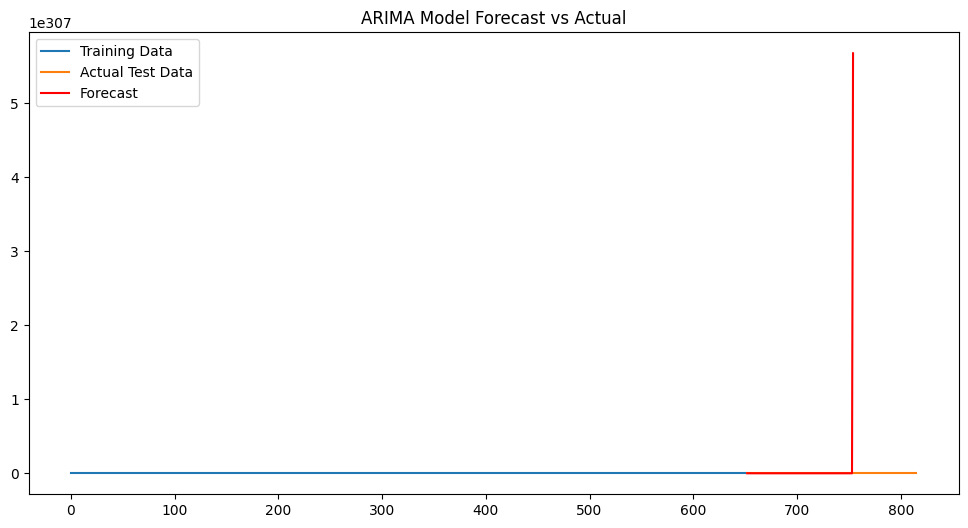

ValueError: Input contains infinity or a value too large for dtype('float64').

In [126]:
import numpy as np
from statsmodels.tsa.arima.model import ARIMA

# Apply log transformation to stabilize variance
train_data['log_KWH/hh'] = np.log(train_data['KWH/hh'])
test_data['log_KWH/hh'] = np.log(test_data['KWH/hh'])

# Fit ARIMA model on transformed data
model = ARIMA(train_data['log_KWH/hh'], order=(6, 6, 6))
model_fit = model.fit()

# Summarize the model
print(model_fit.summary())

# Forecasting
n_periods = len(test_data)
forecast_log = model_fit.forecast(steps=n_periods)

# Transform forecast back to original scale
forecast = np.exp(forecast_log)
forecast_series = pd.Series(forecast, index=test_data.index)

# Plotting the forecast against actual values
plt.figure(figsize=(12, 6))
plt.plot(train_data['KWH/hh'], label='Training Data')
plt.plot(test_data['KWH/hh'], label='Actual Test Data')
plt.plot(forecast_series, label='Forecast', color='red')
plt.legend(loc='upper left')
plt.title('ARIMA Model Forecast vs Actual')
plt.show()

# Calculate MAE and RMSE
mae = mean_absolute_error(test_data['KWH/hh'], forecast_series)
rmse = mean_squared_error(test_data['KWH/hh'], forecast_series, squared=False)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
